
# <span style="color:rgb(213,80,0)">Segmenting an image of Greek coins into regions</span>

This demo follows the sklearn image segmentation example available at [https://scikit-learn.org/stable/auto_examples/cluster/plot_coin_segmentation.html](https://scikit-learn.org/stable/auto_examples/cluster/plot_coin_segmentation.html)


That example uses spectral clustering to identify connected pixel regions of similar grayscale in an image. Spectral clustering is well suited for image segmentation tasks as it naturally works with graph Laplacians that can encode neighborhood information about nodes (in this case, the nodes are the pixels of an image). In such a way, the method favours clustering nearby pixels together, tending to produce connected 2D regions in an image.


CLASSIX is primarily a distance-based clustering method, but we can encode affinity information of pixels as additional features of the data points. More precisely, we can represent each grayscale pixel as a 3D point of the form [c,scl*x,scl*y], where <samp>c</samp> is the colour value, and <samp>x,y</samp> are the pixel coordinates. The scaling parameter <samp>scl</samp> is used to control the relative weighting between colour and position of a pixel.


In this example we make use of MATLAB's Python interface to load the Greek coins image and preprocess (smooth, downsample) it exactly as in the sklearn image segmentation example.



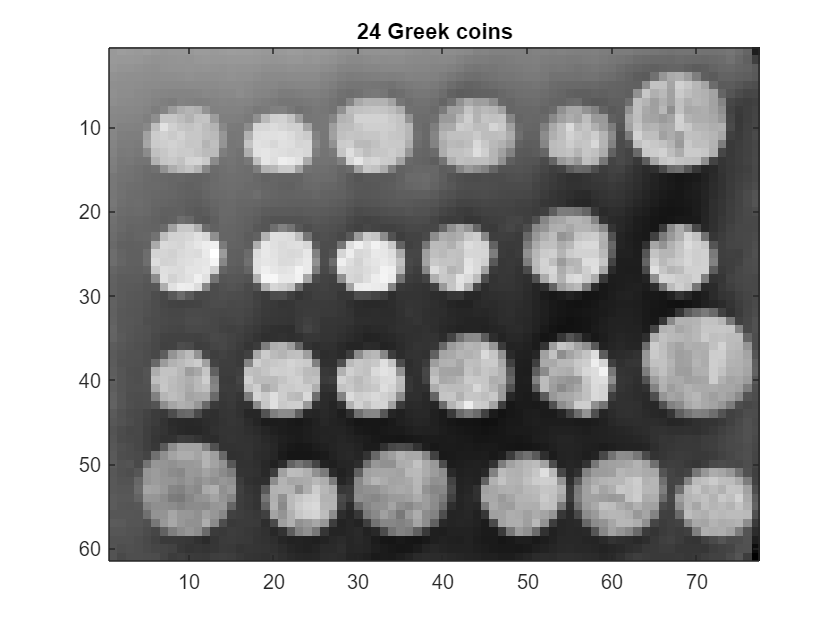

In [1]:
clear all
addpath ..

% get data
pyrun("from skimage.data import coins")
pyrun("from scipy.ndimage import gaussian_filter")
pyrun("from skimage.transform import rescale")

pyrun("orig_coins = coins()")
% Resize it to 20% of the original size to speed up the processing
% Applying a Gaussian filter for smoothing prior to down-scaling
% reduces aliasing artifacts.
pyrun("smoothened_coins = gaussian_filter(orig_coins, sigma=2)")
coins = pyrun("coins = rescale(smoothened_coins, 0.2, mode='reflect', anti_aliasing=False)","coins");
coins = double(coins);

% plot
imagesc(coins)
colormap gray
title('24 Greek coins')

## Running CLASSIX

We now run CLASSIX. The parameters require some fine tuning, but CLASSIX runs fast enough for this to be not too cumbersome.


In [2]:
[ny,nx] = size(coins);
[X,Y] = meshgrid(1:nx,1:ny);
scl = 0.08; % locality weighing
data = [ coins(:), scl*X(:), scl*Y(:) ];
tic
[labels,explain,out] = classix(data,0.03,20);
fprintf('Runtime in seconds: %f\nNumber of clusters: %d', toc, length(unique(labels)))

Runtime in seconds: 0.396151
Number of clusters: 25


This took just under half a second. Note that 25 clusters were computed. These correspond to the 24 coins plus the image background.


Calling CLASSIX's <samp>explain</samp> method leads to fascinating output: it essentially regenerates the original image without "knowing" that the provided 3D data matrix corresponded to an image!


CLASSIX clustered 4697 data points with 3 features.
The radius parameter was set to 0.03 and MinPts was set to 20.
As the provided data was auto-scaled by a factor of 1/2.19,
points within a radius R=0.03*2.19=0.07 were grouped together.
In total, 140910 distances were computed (30.0 per data point).
This resulted in 4697 groups, each with a unique group center.
These 4697 groups were subsequently merged into 25 clusters.
In order to explain the clustering of individual data points,
use explain(ind1) or explain(ind1,ind2) with indices of points.


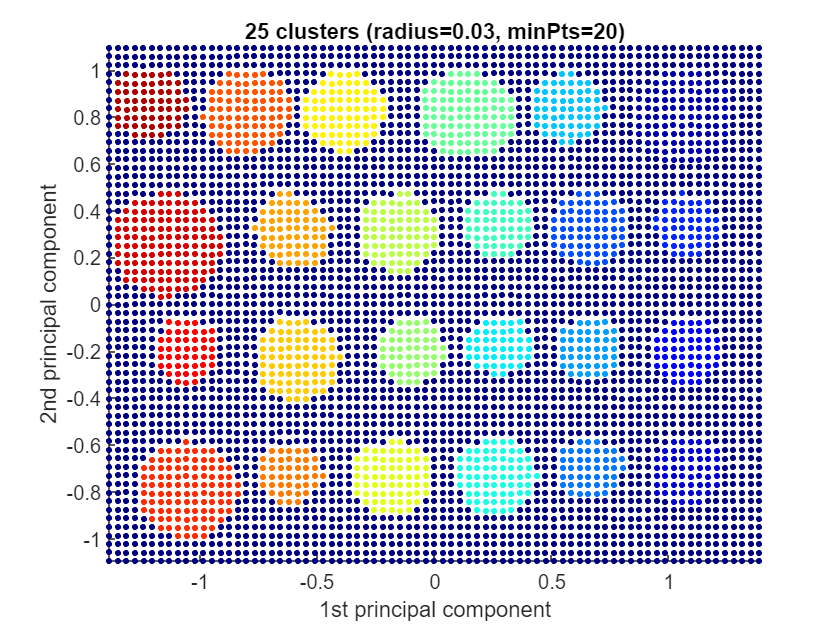

In [3]:
explain();


We can also reshape the <samp>labels</samp> returned by CLASSIX back to the original image size and plot that image:



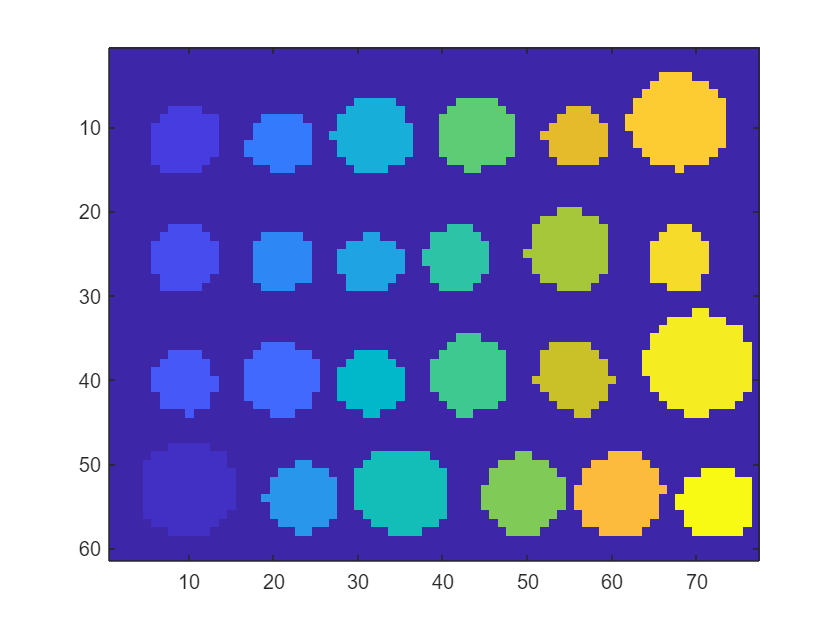

In [4]:
L = reshape(labels,ny,nx);
figure
imagesc(L)

## Comparison with CLASSIX.PY and other methods

The repository of the Python implementation (CLASSIX.PY) contains a very similar demo including comparisons to spectral clustering: [https://github.com/nla-group/classix/blob/master/demos/Segmenting_greek_coins.ipynb](https://github.com/nla-group/classix/blob/master/demos/Segmenting_greek_coins.ipynb)


 When run on the same laptop

-  spectral clustering required about 3.17 seconds
-  CLASSIX.PY required about 0.61 seconds
-  CLASSIX.M (this example) required about 0.40 seconds

to segment the Greek coin image to similar quality.


It is a common observation that CLASSIX's MATLAB implementation is slightly faster than Python. In Python, using sklearn's <samp>spectral_clustering</samp> method with the <samp>cluster_qr</samp> option (the fastest we have tried), CLASSIX.PY is about five times faster than spectral clustering on this example.

